# Graded Project
Web Development using Flask

Domain: Finance and Banking.
Context:
Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan.
Company wants to automate the loan eligibility process based on customer
detail provided while filling the details online.

They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
others for checking the eligibility for the home loan.
Project Objective:
1) This is a standard supervised classification task. A classification problem
where we have to predic whether a customer is eligible for loan or not based on
a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by
entering the username and password and login to the website and then enter
their details to check whether they are eligible for loan or not.

Dataset Description:
SL. No Attribute Description
1. Loan ID Unique Loan ID
2. Gender Male or Female
3. Married Applicant married (Y/N)
4. Dependents Number of dependents
5. Self employed Self employed (Y/N)
6. Education Graduate/Undergraduate
7. Applicant Income Applicant income (in dollars)
8. Co Applicant Income Co Applicant Income (in dollars)
9. Loan Amount Loan amount in thousands (in dollars)
10. Loan Amount Term Term of loan in months
11. Credit History Credit history meets guidelines Yes/No(1/0)
12. Property area Urban/Semi Urban/Rural
13. Loan Status (Target) Loan Approved (Y/N)


# 1. Import required libraries and read the dataset.

In [12]:
from flask import Flask, render_template, request, jsonify
import pickle
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from bs4 import BeautifulSoup
import webbrowser
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

a. Load the dataset and first few sample

In [2]:
df = pd.read_csv('loan_approval_data.csv',encoding='unicode_escape')
print(df.head())

    loan_id gender married  dependents     education self_employed  \
0  lp001002   male      no         0.0      graduate            no   
1  lp001003   male     yes         1.0      graduate            no   
2  lp001005   male     yes         0.0      graduate           yes   
3  lp001006   male     yes         0.0  not graduate            no   
4  lp001008   male      no         0.0      graduate            no   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   credit_history property_area loan_status  
0             1.0         urban           y  
1             1.0         rural           n  
2             

b. shape, info of the data

In [3]:
def basic_info(df):
    '''checking basic information & shape about the dataframe'''
    temp=df.copy(deep=True)
    print("Shape of the dataset",df.shape)
    print("*"*30)
    print(df.info())
    
basic_info(df)

Shape of the dataset (614, 13)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB
None


# 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64


In [9]:
df = pd.DataFrame(df)
# Drop redundant rows (if any)
df.drop_duplicates(inplace=True)

# Drop redundant columns (if any)
df.drop(columns=['property_area'], inplace=True)

print(df)

      loan_id  gender married  dependents     education self_employed  \
0    lp001002    male      no         0.0      graduate            no   
1    lp001003    male     yes         1.0      graduate            no   
2    lp001005    male     yes         0.0      graduate           yes   
3    lp001006    male     yes         0.0  not graduate            no   
4    lp001008    male      no         0.0      graduate            no   
..        ...     ...     ...         ...           ...           ...   
609  lp002978  female      no         0.0      graduate            no   
610  lp002979    male     yes         3.0      graduate            no   
611  lp002983    male     yes         1.0      graduate            no   
612  lp002984    male     yes         2.0      graduate            no   
613  lp002990  female      no         0.0      graduate           yes   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0               5849                0.0         Na

# 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. 

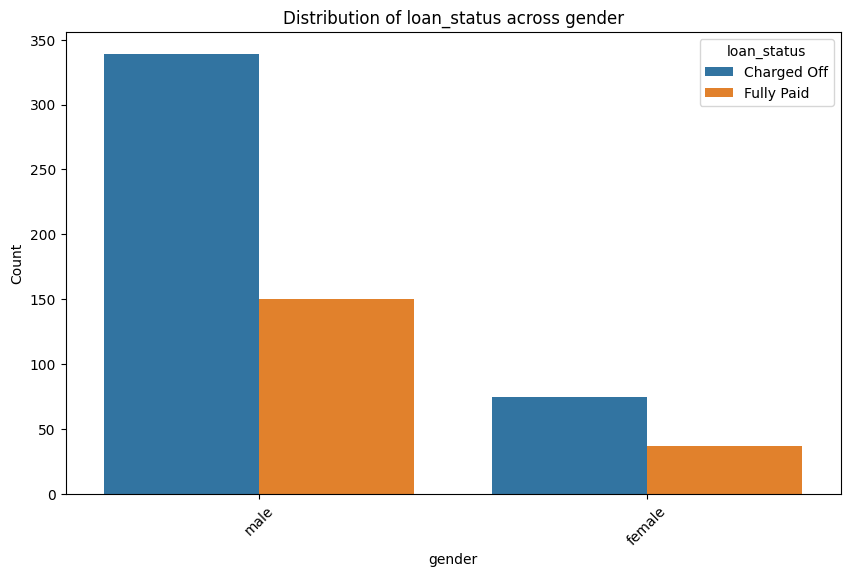

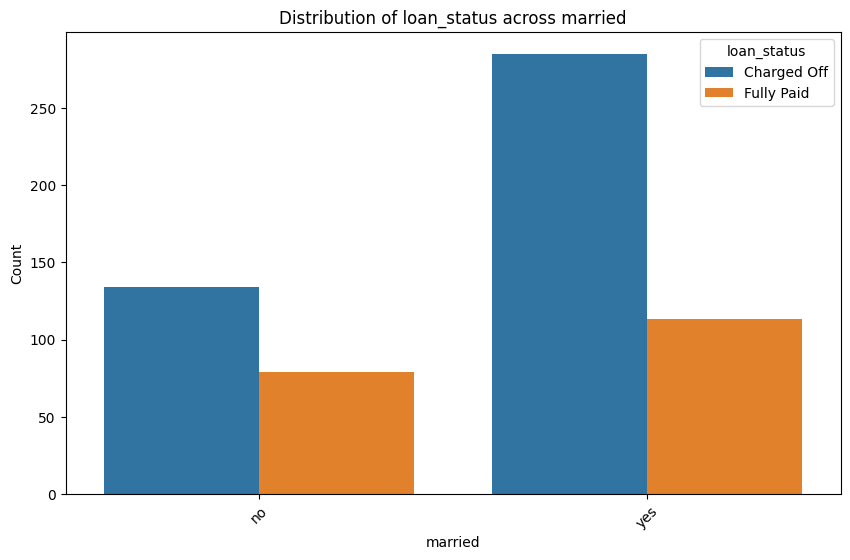

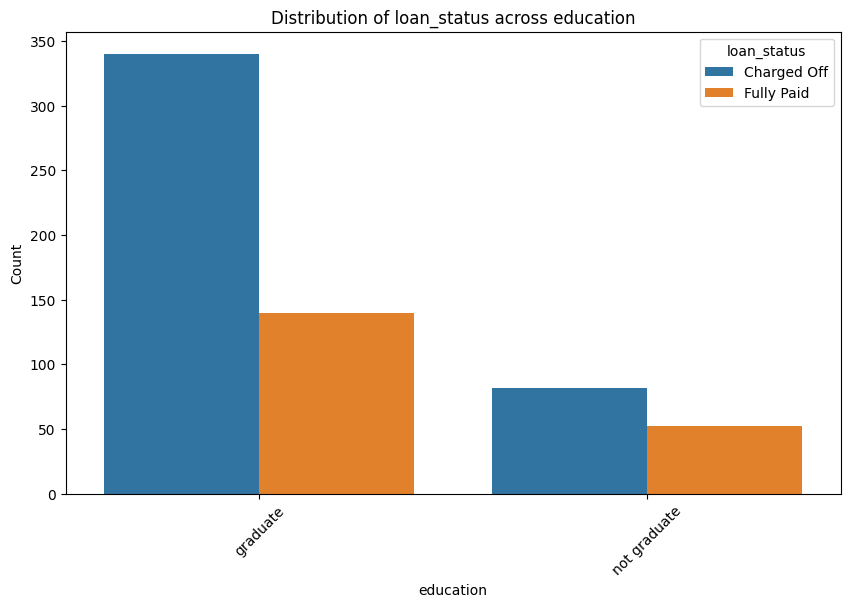

In [7]:
categorical_features = ['gender', 'married', 'education']

# Visualize the distribution of 'loan_status' with respect to each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Distribution of loan_status across {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='loan_status', loc='upper right', labels=['Charged Off', 'Fully Paid'])
    plt.xticks(rotation=45)
    plt.show()

# 5. Encode the categorical data. 

In [16]:
df = pd.DataFrame(df)

# Use Label Encoding to encode 'Category'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['education'])

print(df['education'],df['Category_Encoded'])

0          graduate
1          graduate
2          graduate
3      not graduate
4          graduate
           ...     
609        graduate
610        graduate
611        graduate
612        graduate
613        graduate
Name: education, Length: 614, dtype: object 0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Category_Encoded, Length: 614, dtype: int32


# 6. Separate the target and independent features and split the data into train and test. 

In [17]:
df = pd.DataFrame(df)

# Separate the target variable (y) and independent features (X)
X = df.drop(columns='self_employed')
y = df['self_employed']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 12)
X_test shape: (123, 12)
y_train shape: (491,)
y_test shape: (123,)


# 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [29]:
# Example data to be saved to the .pkl file
data = df;

# Specify the file path where you want to save the .pkl file
file_path = r'C:\\Users\\91733\\loan_status_model.pkl';

# Save the data to the .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(df, file)

print(f"Data saved successfully to {file_path}.")

Data saved successfully to C:\\Users\\91733\\loan_status_model.pkl.


In [15]:
df = pd.read_csv('loan_approval_data.csv',encoding='unicode_escape')
# Separate the target variable (y) and independent features (X)
X = df.drop(columns='loan_status')
y = df['loan_status']

# One-hot encode the categorical columns in X
X_encoded = pd.get_dummies(X)

# Label encode the target variable
loan_status_model = LabelEncoder()
y_encoded = loan_status_model.fit_transform(y)

# Replace missing values with mean of the column
imputer = SimpleImputer(strategy='mean')
X_encoded = imputer.fit_transform(X_encoded)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Build the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Save the model and label encoder using pickle
with open('loan_status_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

print("Model and label encoder saved successfully.")

Model Accuracy: 0.7804878048780488
Model and label encoder saved successfully.
